# Recommendation System

### Data Description:

Unique ID of each anime.
Anime title.
Anime broadcast type, such as TV, OVA, etc.
anime genre.
The number of episodes of each anime.
The average rating for each anime compared to the number of users who gave ratings.


Number of community members for each anime.
Objective:
The objective of this assignment is to implement a recommendation system using cosine similarity on an anime dataset. 
Dataset:
Use the Anime Dataset which contains information about various anime, including their titles, genres,No.of episodes and user ratings etc.

## Tasks:

### Data Preprocessing:

Load the dataset into a suitable data structure (e.g., pandas DataFrame).
Handle missing values, if any.
Explore the dataset to understand its structure and attributes.

### Feature Extraction:

Decide on the features that will be used for computing similarity (e.g., genres, user ratings).
Convert categorical features into numerical representations if necessary.
Normalize numerical features if required.

### Recommendation System:

Design a function to recommend anime based on cosine similarity.
Given a target anime, recommend a list of similar anime based on cosine similarity scores.
Experiment with different threshold values for similarity scores to adjust the recommendation list size.

### Evaluation:

Split the dataset into training and testing sets.
Evaluate the recommendation system using appropriate metrics such as precision, recall, and F1-score.
Analyze the performance of the recommendation system and identify areas of improvement.

## Interview Questions:
1. Can you explain the difference between user-based and item-based collaborative filtering?
2. What is collaborative filtering, and how does it work?

### Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250
import warnings
warnings.filterwarnings('ignore')
sns.set_theme(style='darkgrid', palette='viridis')
%matplotlib inline

### Load the data

In [2]:
df = pd.read_csv('anime.csv')
df

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
12290,5543,Under World,Hentai,OVA,1,4.28,183
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175


# EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


* episode column has numerical values but still the data type is object

In [4]:
df['episodes'].unique()

array(['1', '64', '51', '24', '10', '148', '110', '13', '201', '25', '22',
       '75', '4', '26', '12', '27', '43', '74', '37', '2', '11', '99',
       'Unknown', '39', '101', '47', '50', '62', '33', '112', '23', '3',
       '94', '6', '8', '14', '7', '40', '15', '203', '77', '291', '120',
       '102', '96', '38', '79', '175', '103', '70', '153', '45', '5',
       '21', '63', '52', '28', '145', '36', '69', '60', '178', '114',
       '35', '61', '34', '109', '20', '9', '49', '366', '97', '48', '78',
       '358', '155', '104', '113', '54', '167', '161', '42', '142', '31',
       '373', '220', '46', '195', '17', '1787', '73', '147', '127', '16',
       '19', '98', '150', '76', '53', '124', '29', '115', '224', '44',
       '58', '93', '154', '92', '67', '172', '86', '30', '276', '59',
       '72', '330', '41', '105', '128', '137', '56', '55', '65', '243',
       '193', '18', '191', '180', '91', '192', '66', '182', '32', '164',
       '100', '296', '694', '95', '68', '117', '151', '130',

* In episode column there are some 'Unknown' entries, so we will replace those entries by 'None'

In [5]:
df['episodes'].replace('Unknown',None, inplace=True)

In [6]:
df['episodes'].unique()

array(['1', '64', '51', '24', '10', '148', '110', '13', '201', '25', '22',
       '75', '4', '26', '12', '27', '43', '74', '37', '2', '11', '99',
       None, '39', '101', '47', '50', '62', '33', '112', '23', '3', '94',
       '6', '8', '14', '7', '40', '15', '203', '77', '291', '120', '102',
       '96', '38', '79', '175', '103', '70', '153', '45', '5', '21', '63',
       '52', '28', '145', '36', '69', '60', '178', '114', '35', '61',
       '34', '109', '20', '9', '49', '366', '97', '48', '78', '358',
       '155', '104', '113', '54', '167', '161', '42', '142', '31', '373',
       '220', '46', '195', '17', '1787', '73', '147', '127', '16', '19',
       '98', '150', '76', '53', '124', '29', '115', '224', '44', '58',
       '93', '154', '92', '67', '172', '86', '30', '276', '59', '72',
       '330', '41', '105', '128', '137', '56', '55', '65', '243', '193',
       '18', '191', '180', '91', '192', '66', '182', '32', '164', '100',
       '296', '694', '95', '68', '117', '151', '130', '87'

In [7]:
pd.to_numeric(df['episodes'])

0         1.0
1        64.0
2        51.0
3        24.0
4        51.0
         ... 
12289     1.0
12290     1.0
12291     4.0
12292     1.0
12293     1.0
Name: episodes, Length: 12294, dtype: float64

In [8]:
df['episodes']=pd.to_numeric(df['episodes'])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  11954 non-null  float64
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 672.5+ KB


In [10]:
df.describe()

,anime_id,episodes,rating,members
count,12294.000000,11954.000000,12064.000000,1.229400e+04
mean,14058.221653,12.382550,6.473902,1.807134e+04
std,11455.294701,46.865352,1.026746,5.482068e+04
min,1.000000,1.000000,1.670000,5.000000e+00
25%,3484.250000,1.000000,5.880000,2.250000e+02
50%,10260.500000,2.000000,6.570000,1.550000e+03
75%,24794.500000,12.000000,7.180000,9.437000e+03
max,34527.000000,1818.000000,10.000000,1.013917e+06


* There are 12294 records and rating column has 12064 entries, i.e. 230 missing entries are in the rating column
* Also in episode column 340 missing entries
* mean of anime_id column is 14058 and median is 10260, i.e. anime_id column is positively skewed
* difference between 75th percentile and max is huge in episodes column, which implies there are possible outliers at higher side
* rating column seems symmetric
* for members column also mean is greater than median, so members column is also positively skewed

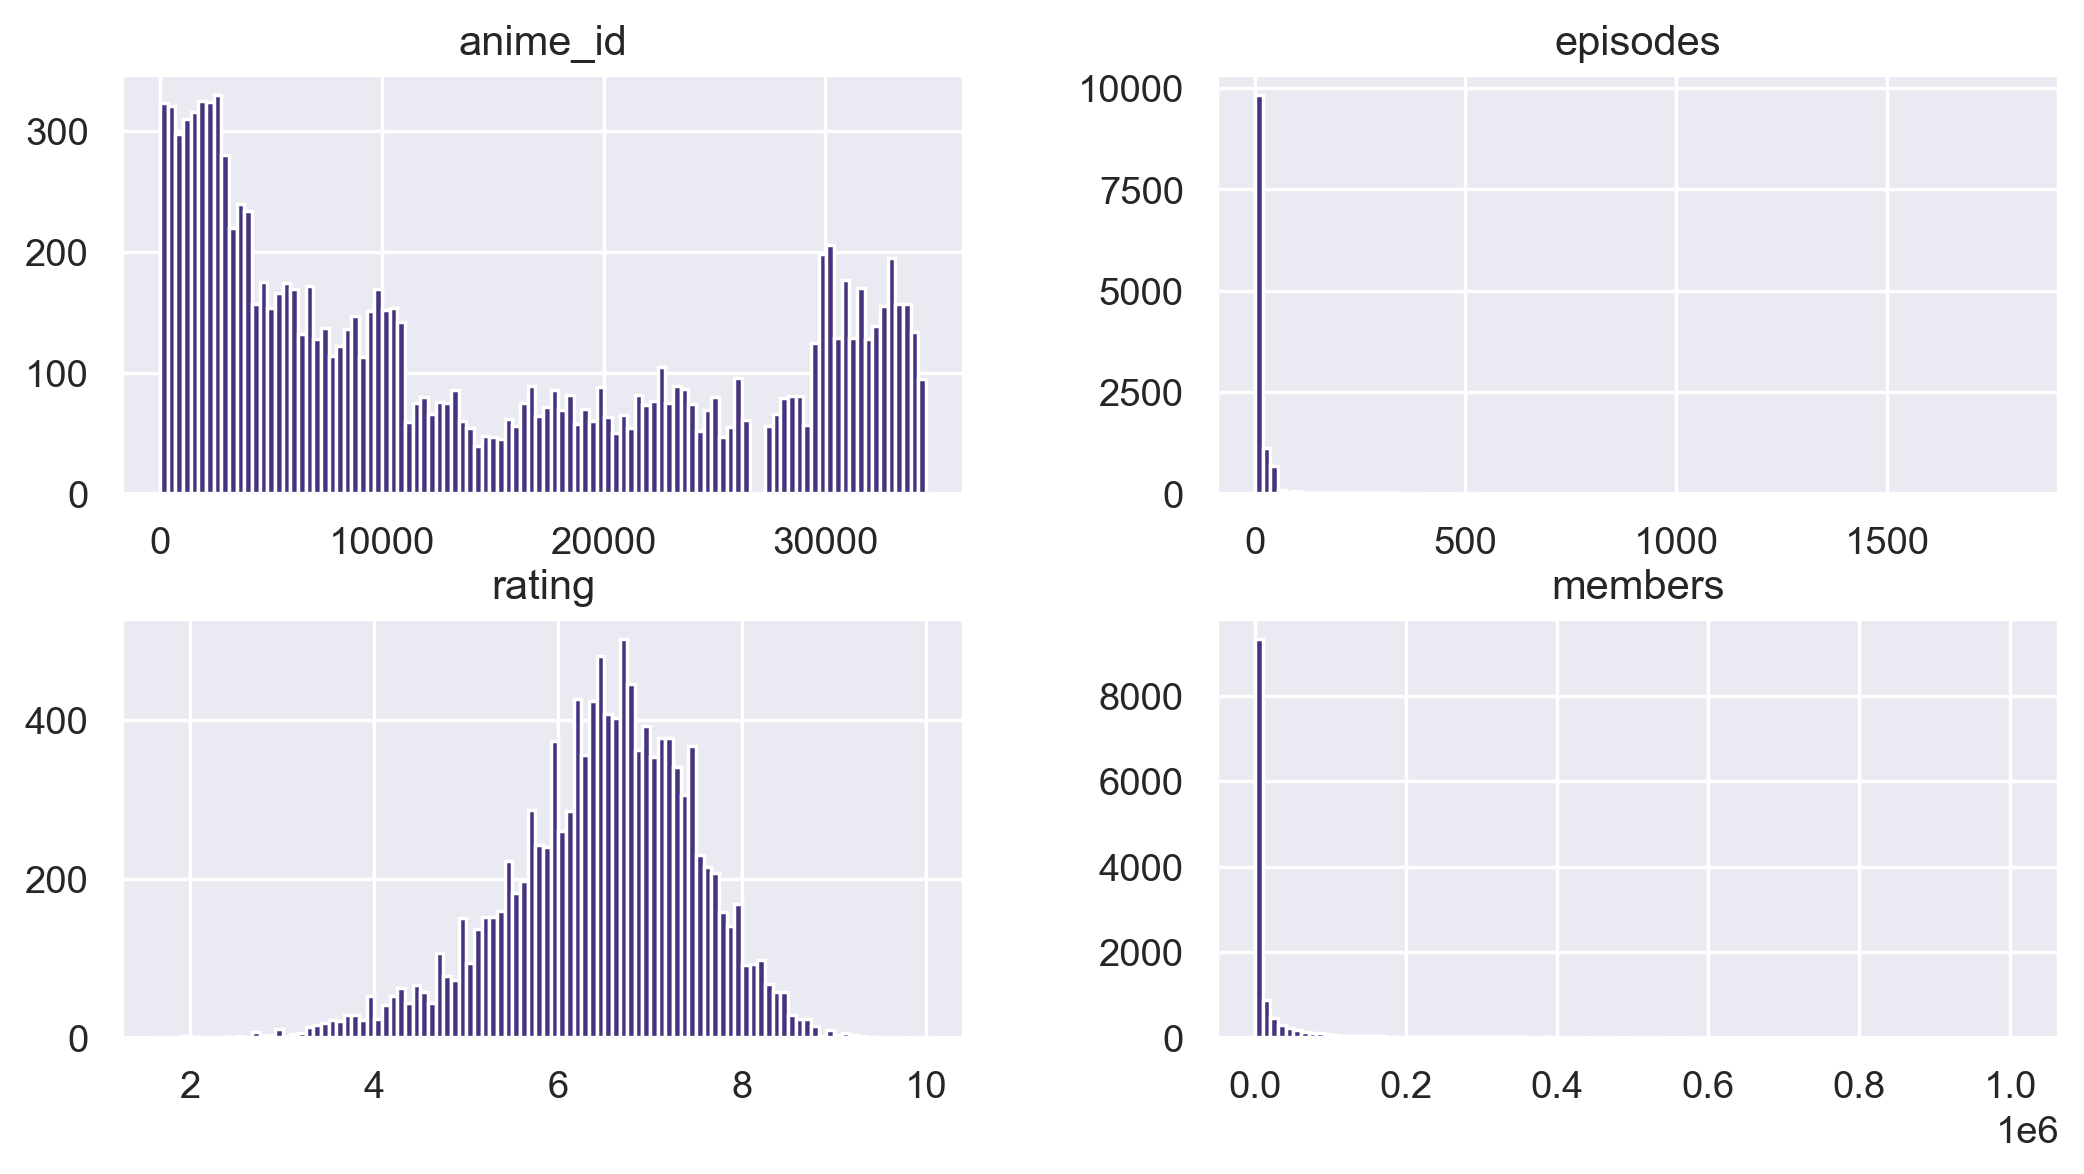

In [11]:
df.hist(bins=100)
plt.show()

<Axes: >

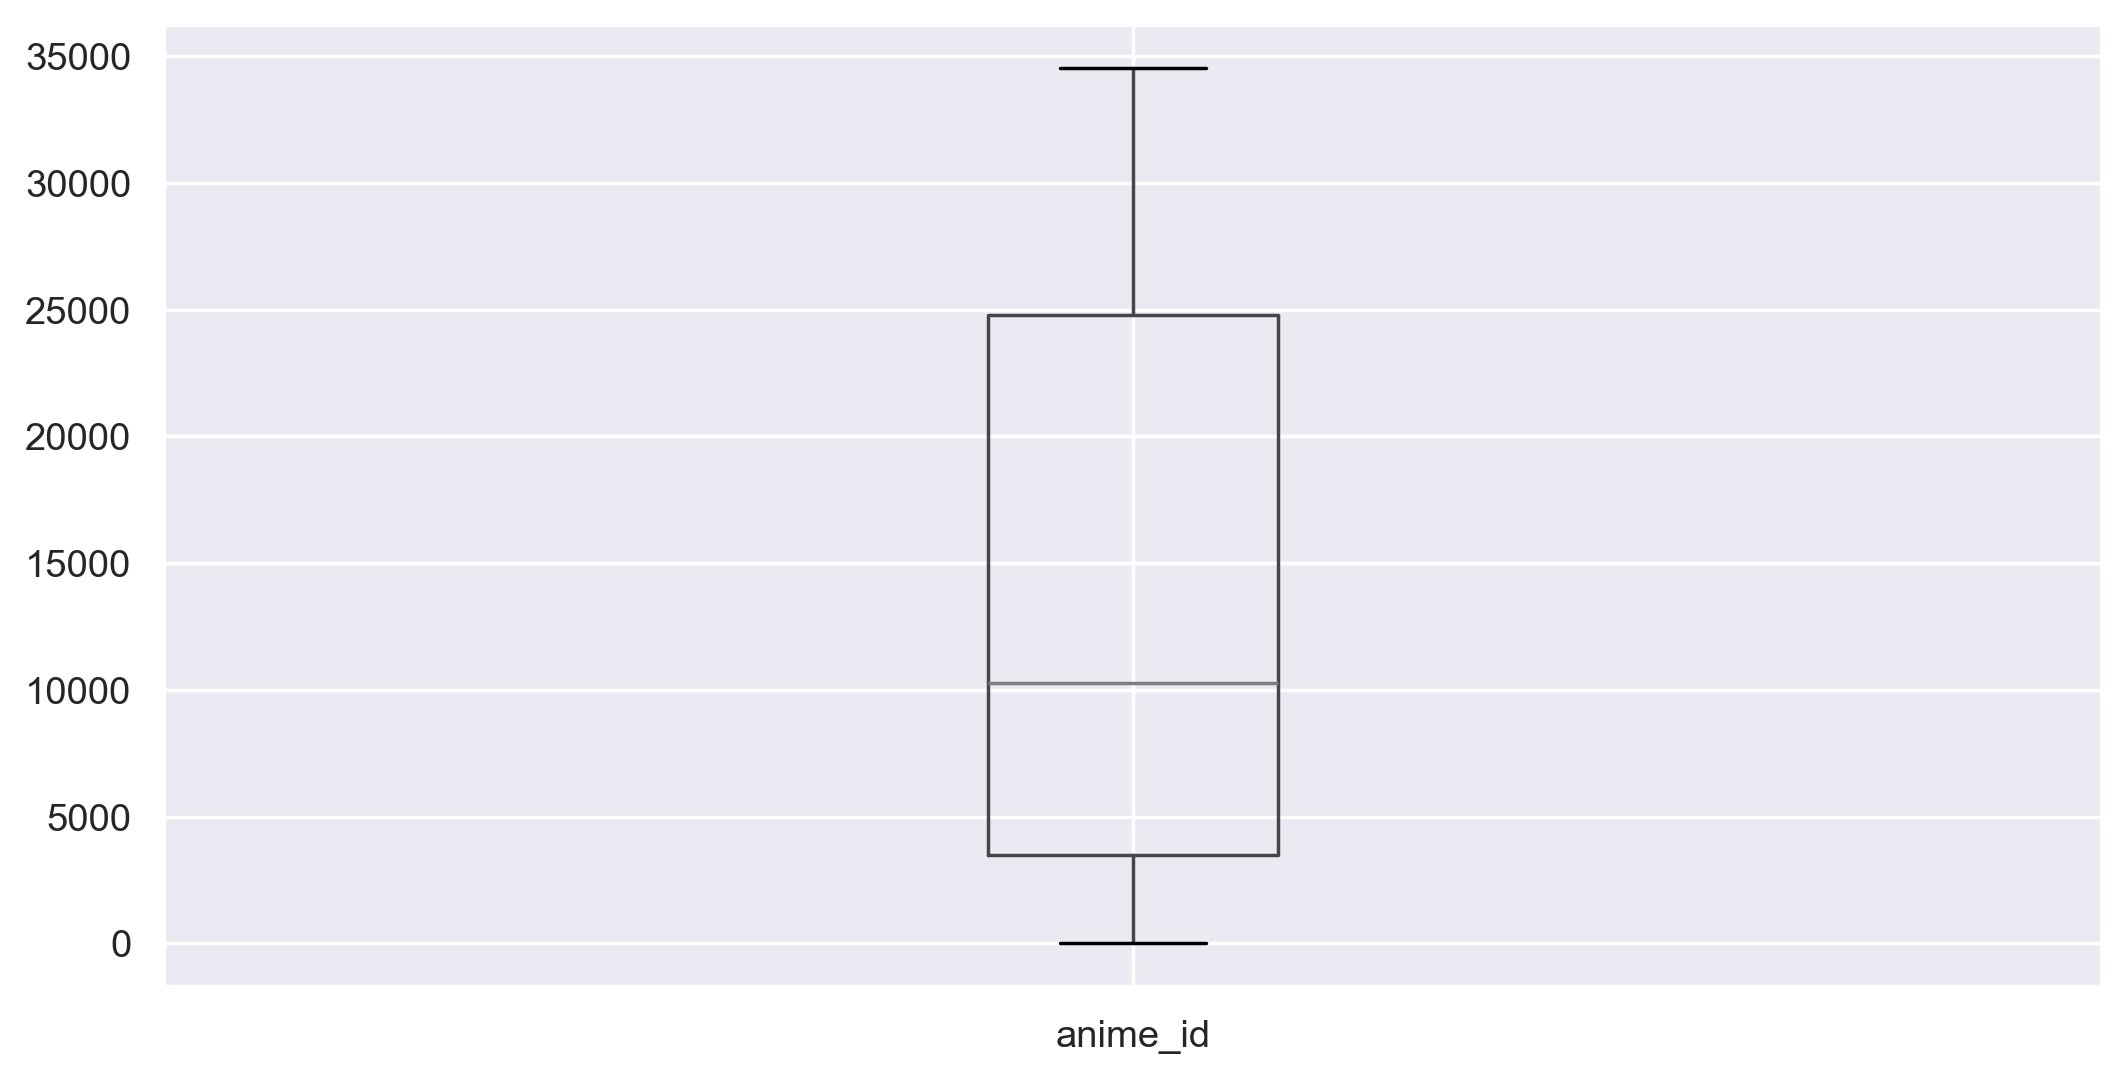

In [12]:
df.boxplot(['anime_id'])

* there are no outliers in anime_id

<Axes: >

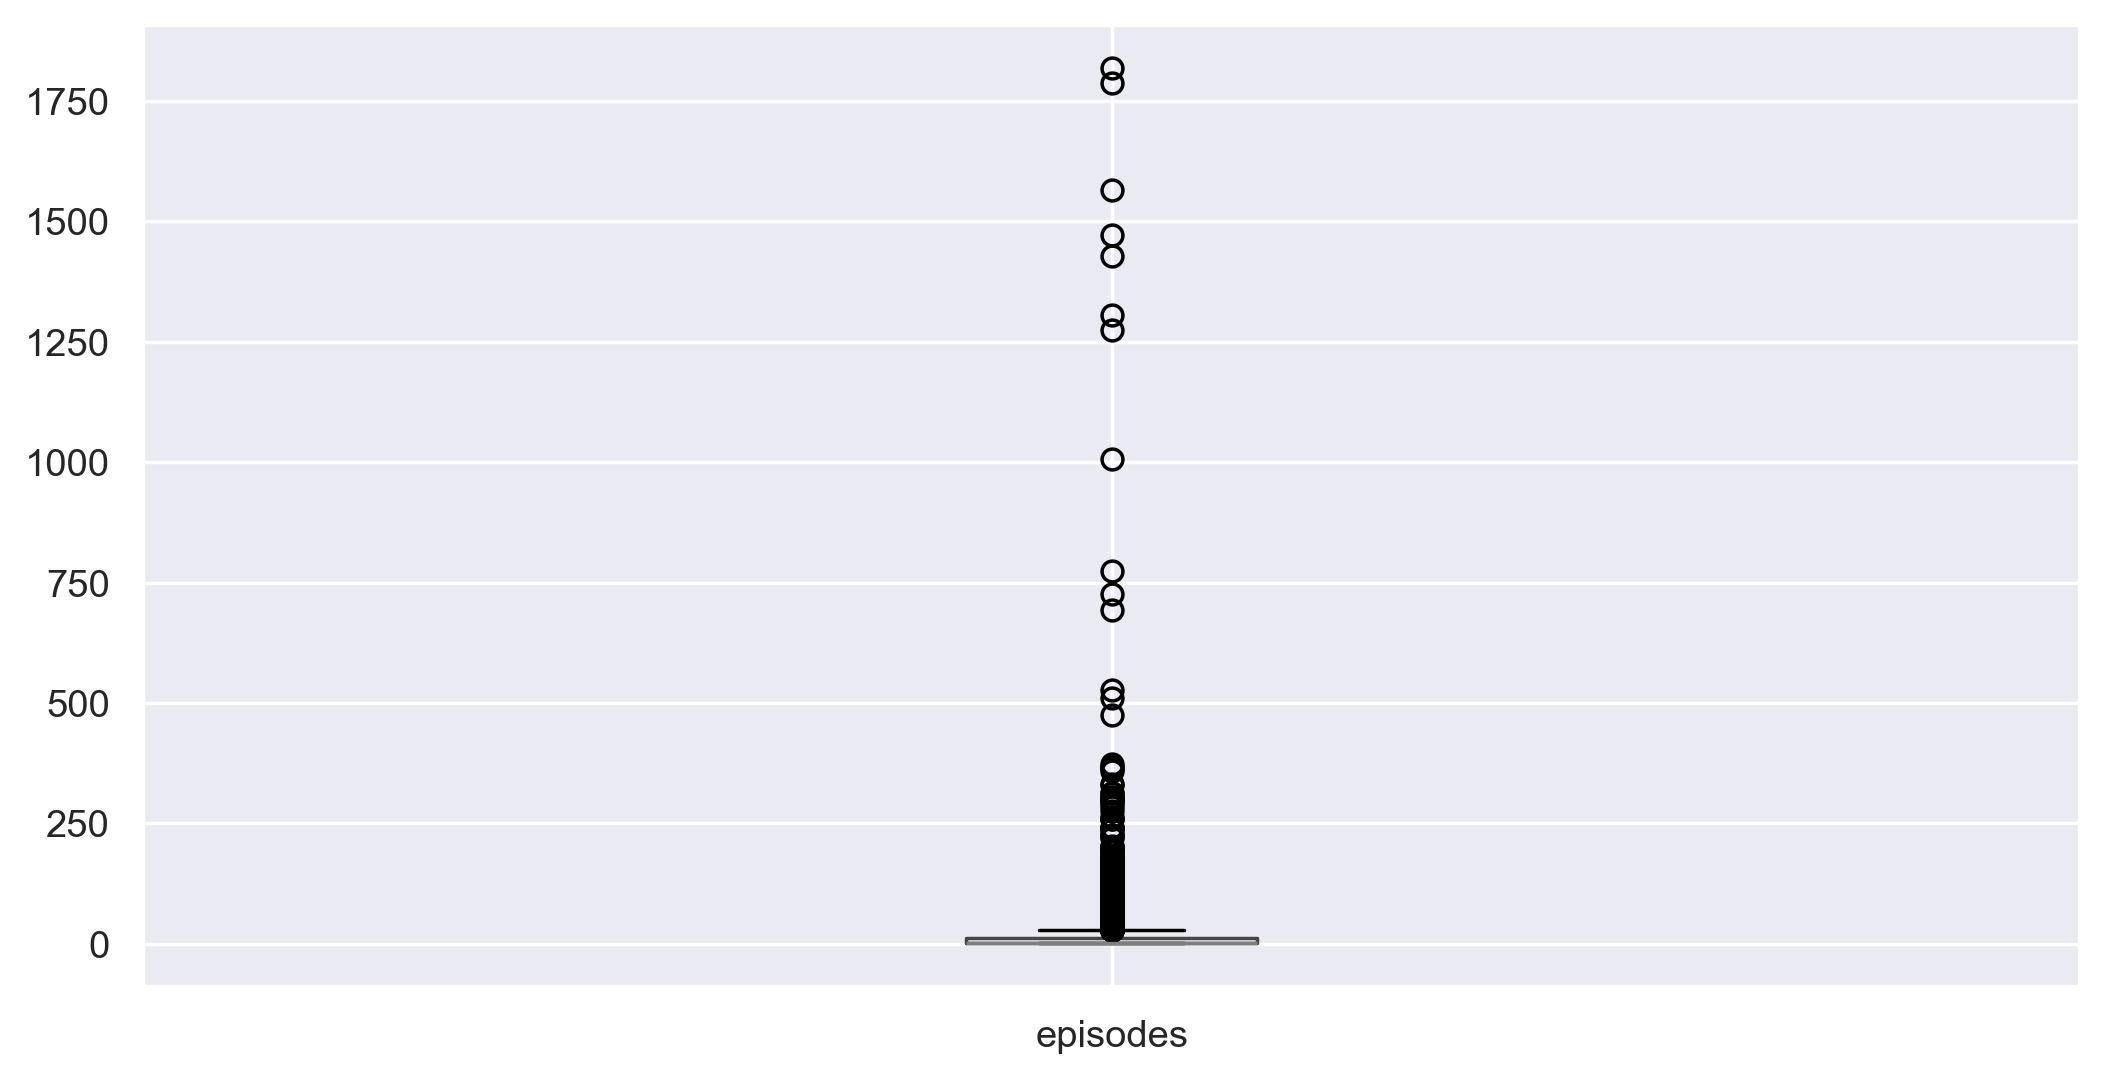

In [13]:
df.boxplot(['episodes'])

* there are outliers at higher side in episodes column

<Axes: >

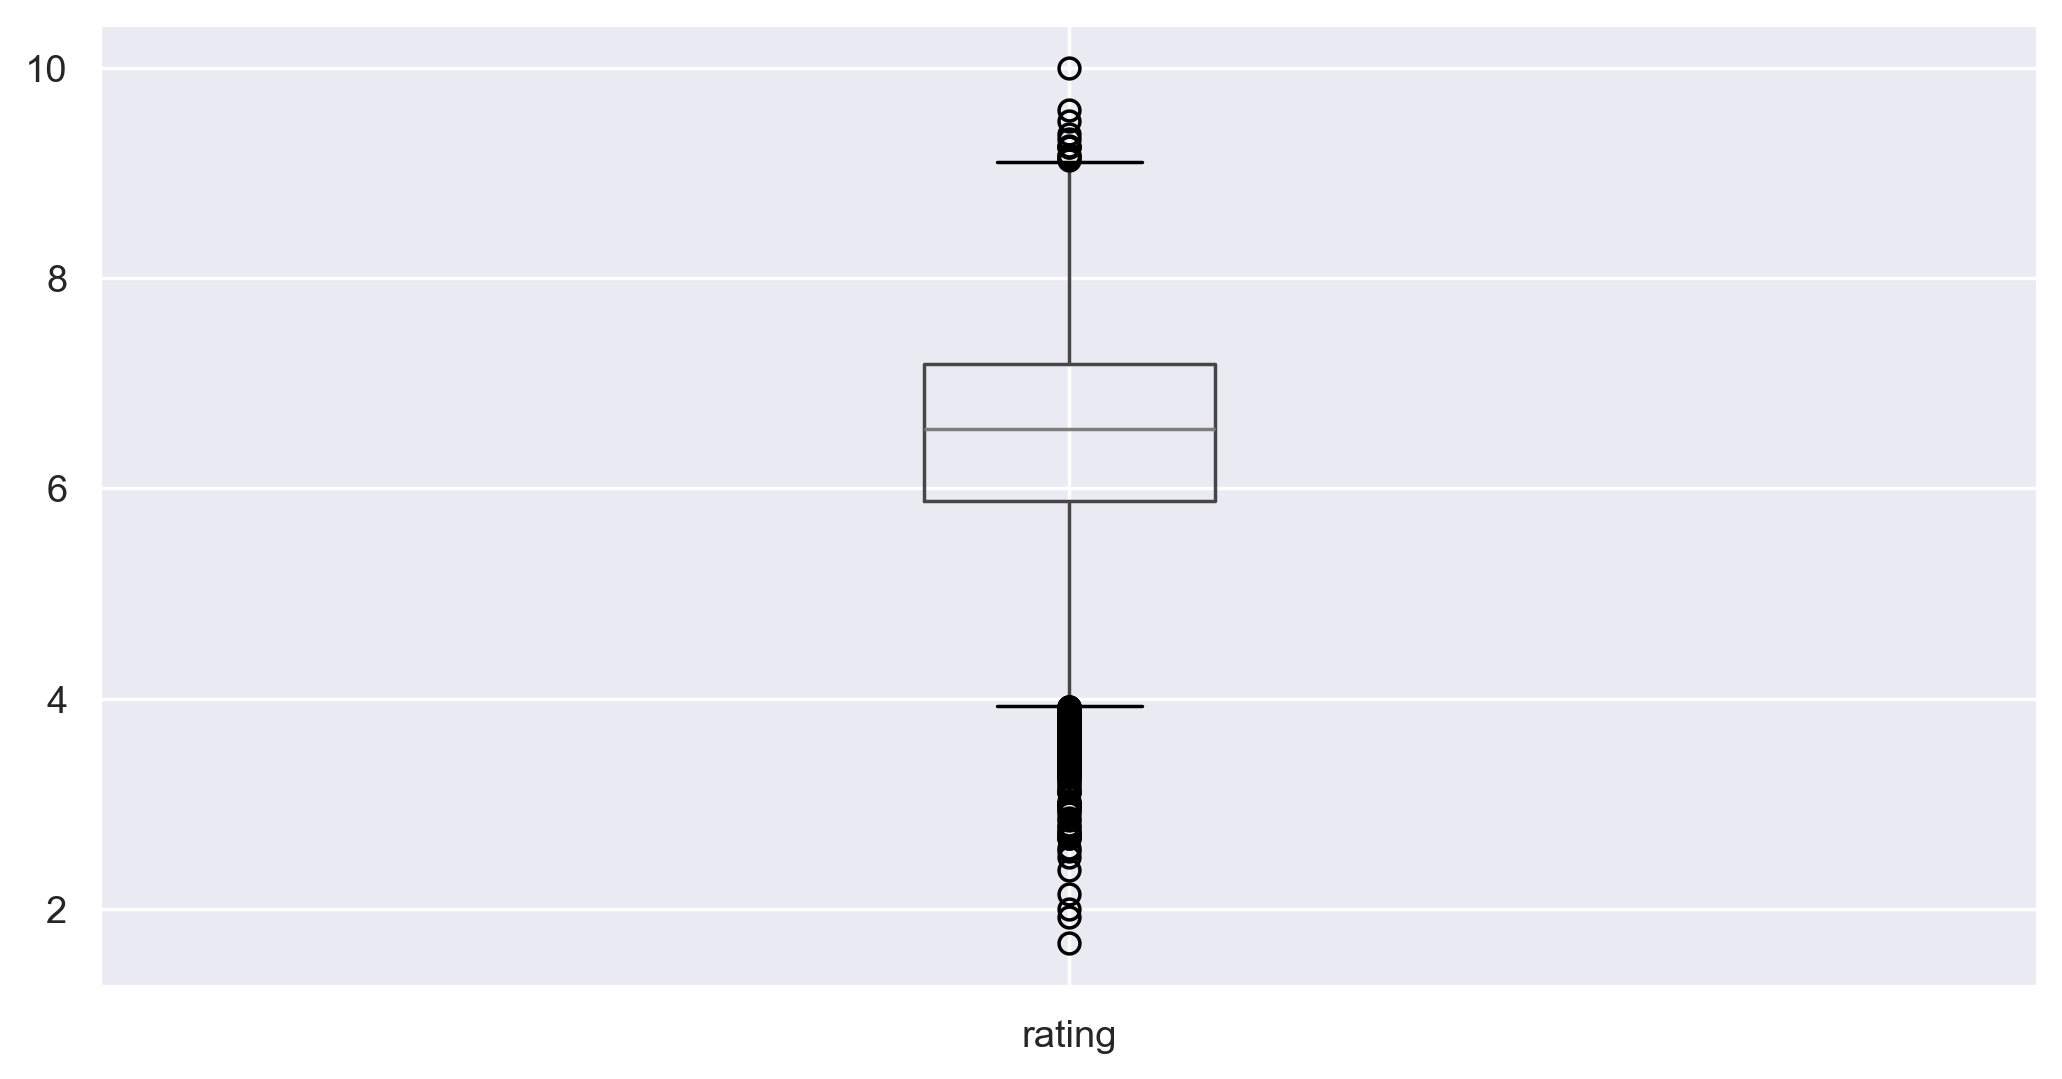

In [14]:
df.boxplot(['rating'])

* rating column has outliers at lower as well as higher side

<Axes: >

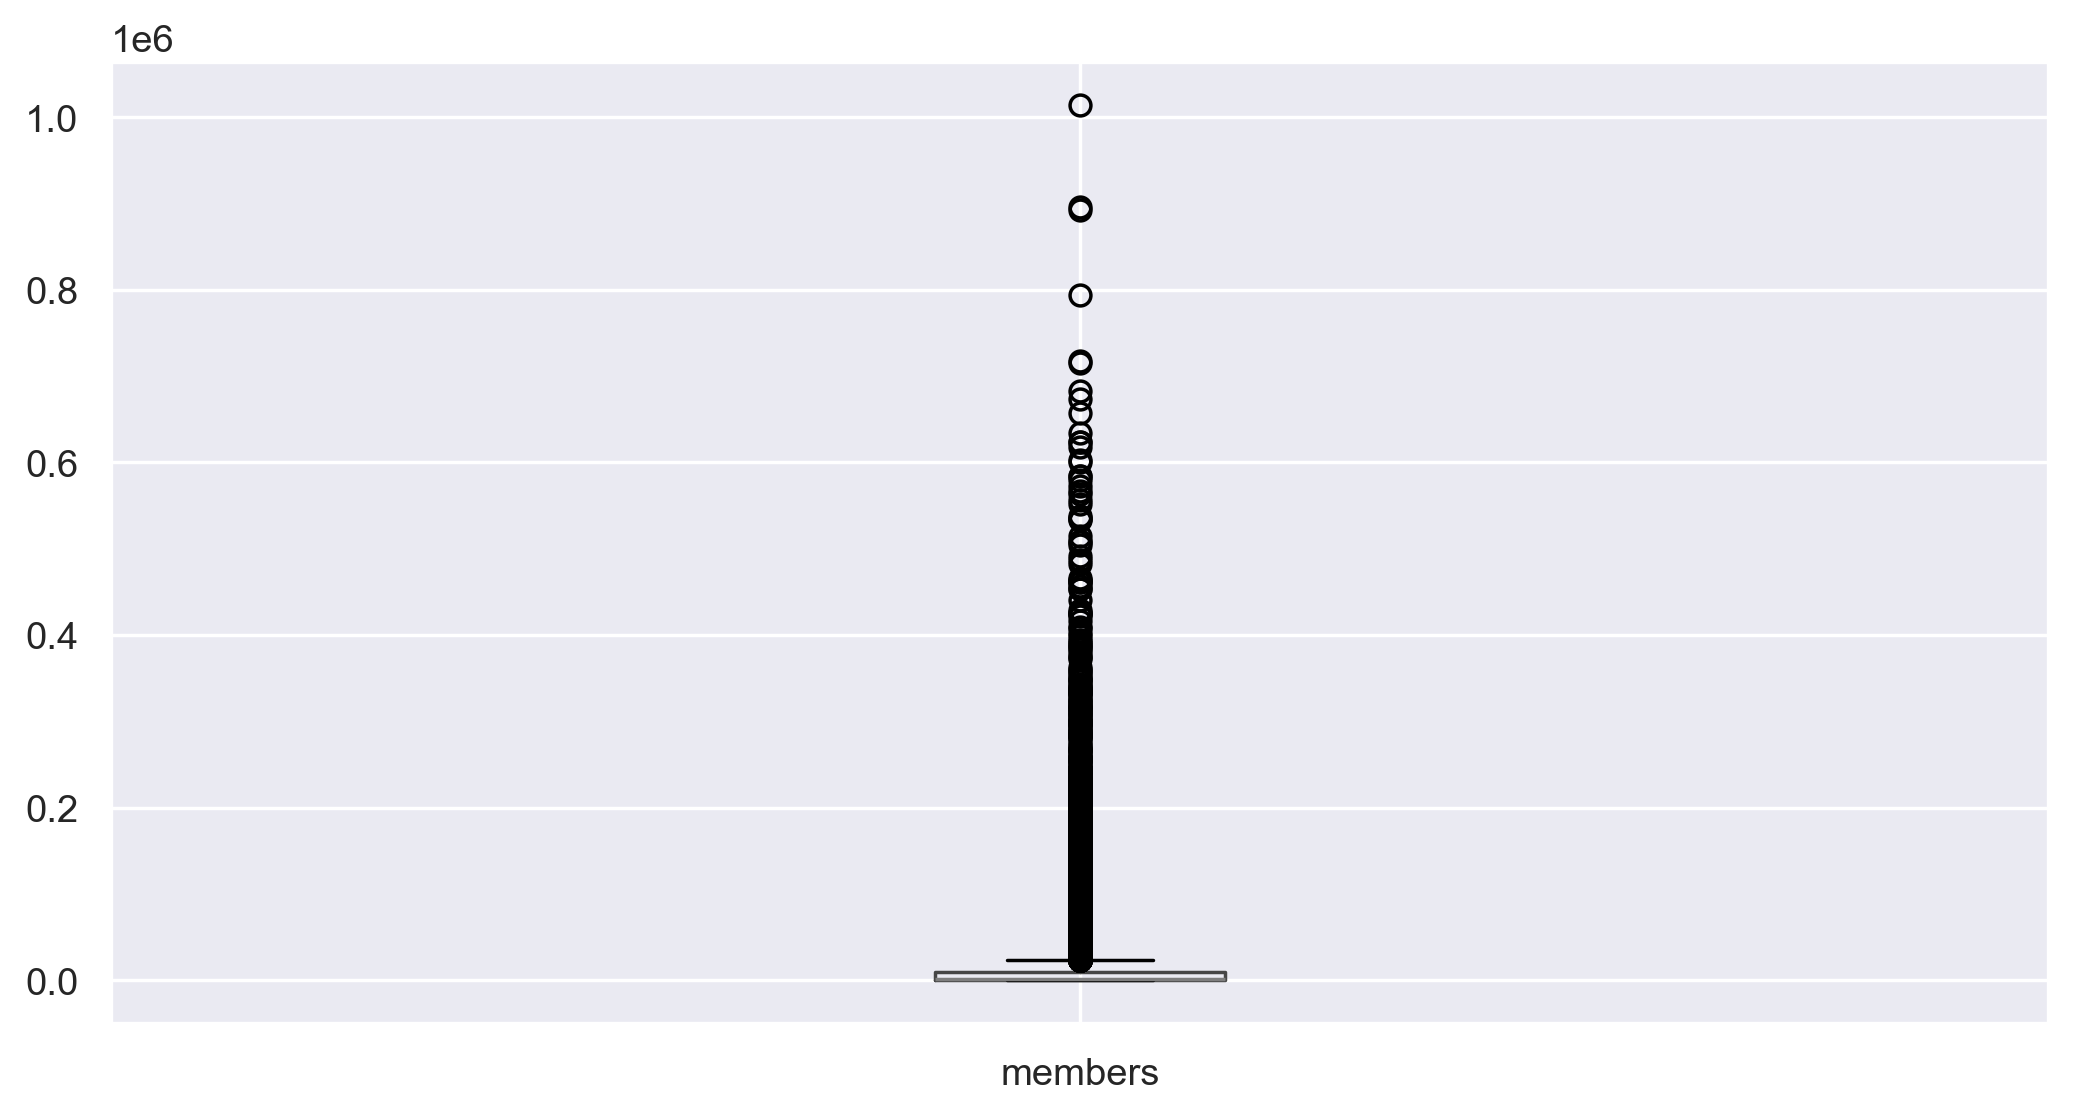

In [15]:
df.boxplot(['members'])

* member column has outliers at higher side

In [16]:
df.describe(include='object')

,name,genre,type
count,12294,12232,12269
unique,12292,3264,6
top,Shi Wan Ge Leng Xiaohua,Hentai,TV
freq,2,823,3787


In [17]:
df['type'].value_counts()

type
TV         3787
OVA        3311
Movie      2348
Special    1676
ONA         659
Music       488
Name: count, dtype: int64

In [18]:
df[df['name']=='Shi Wan Ge Leng Xiaohua']

,anime_id,name,genre,type,episodes,rating,members
10193,33193,Shi Wan Ge Leng Xiaohua,"Comedy, Parody",ONA,12.0,6.67,114
10194,33195,Shi Wan Ge Leng Xiaohua,"Action, Adventure, Comedy, Fantasy, Parody",Movie,1.0,7.07,110


## Data Visualization

### Countplot

<Axes: xlabel='count', ylabel='type'>

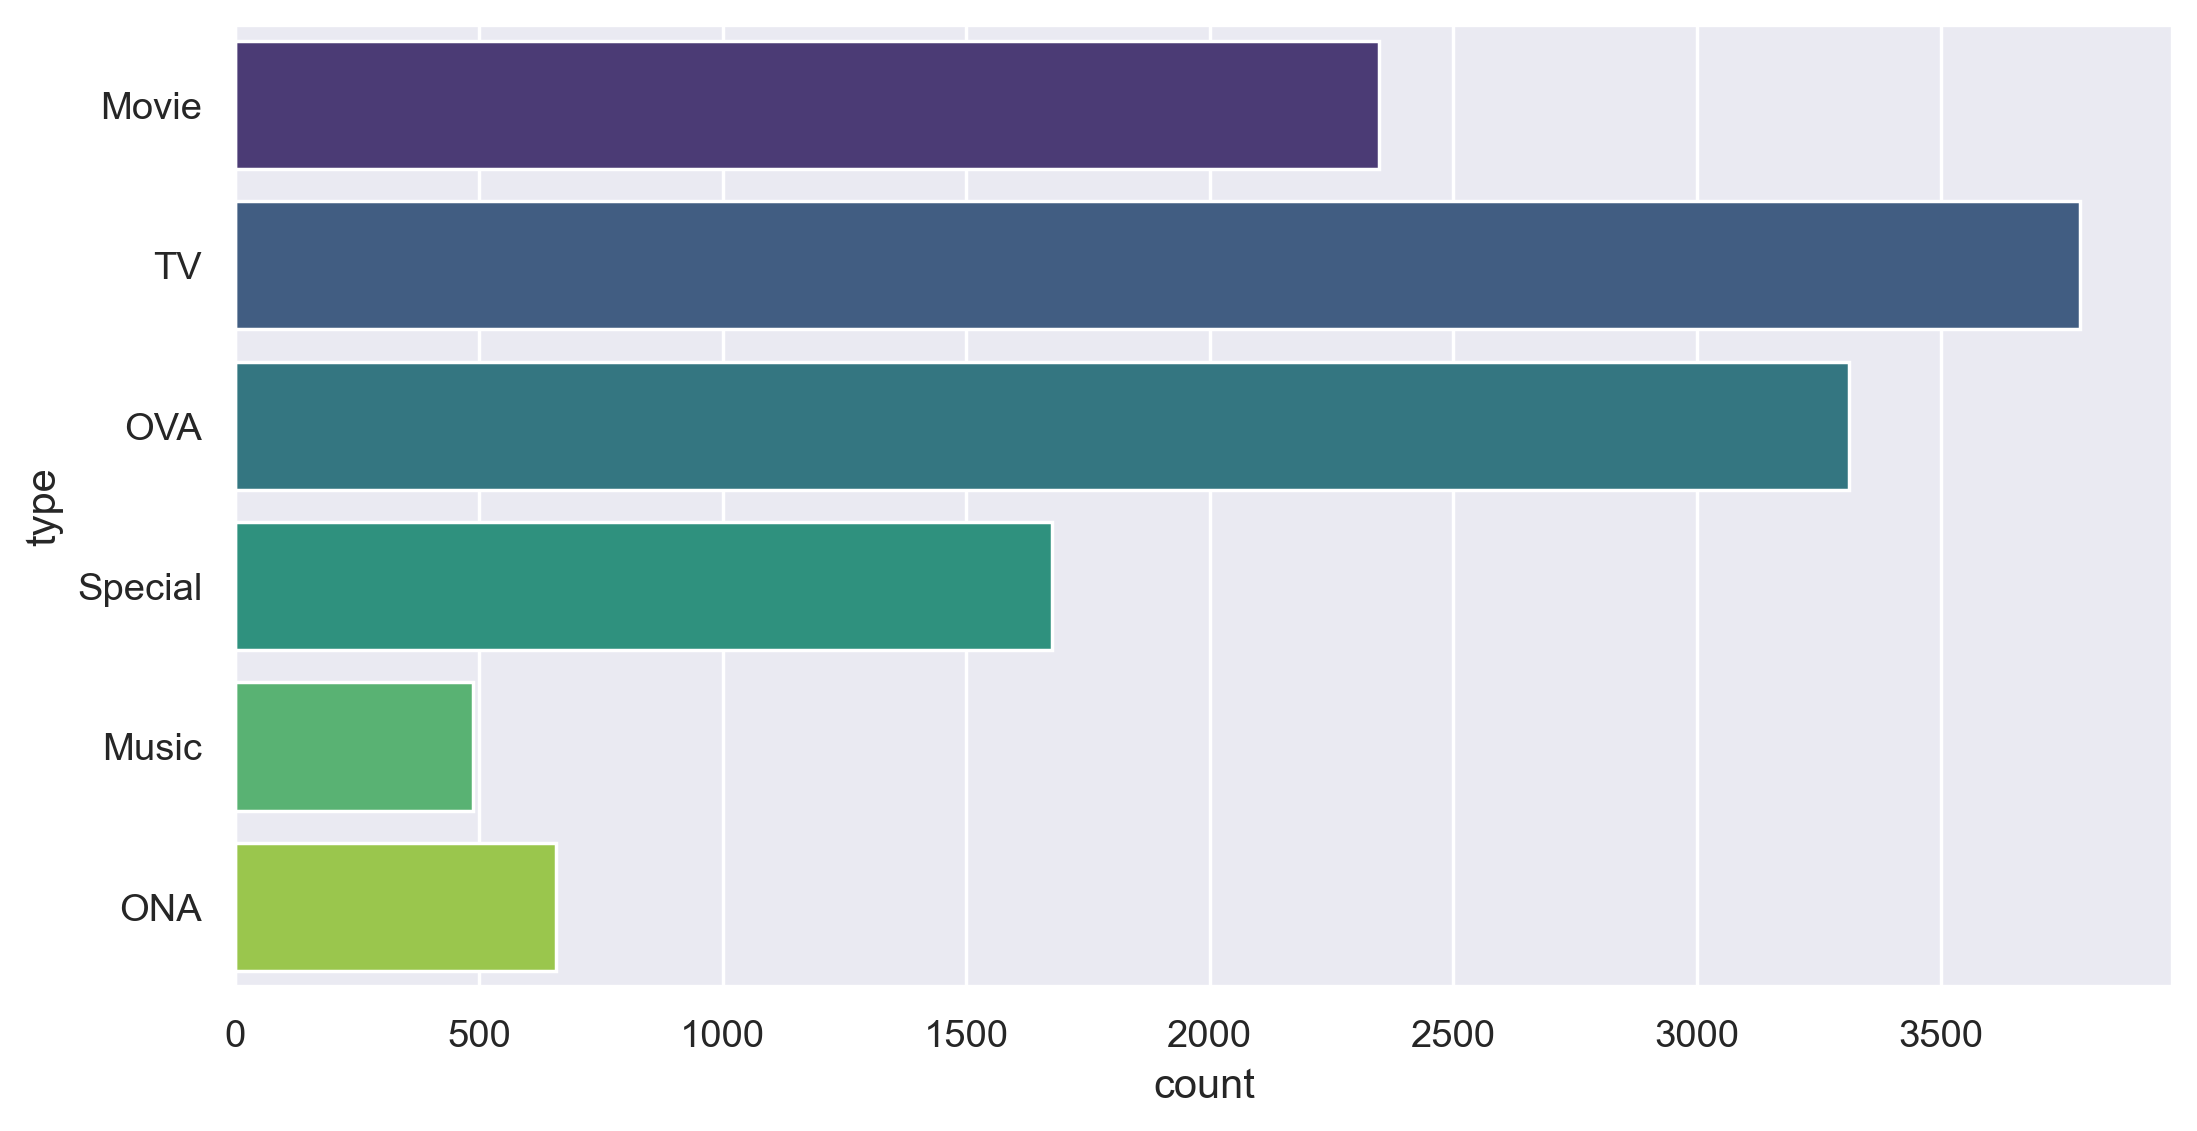

In [23]:
sns.countplot(y = df['type'])

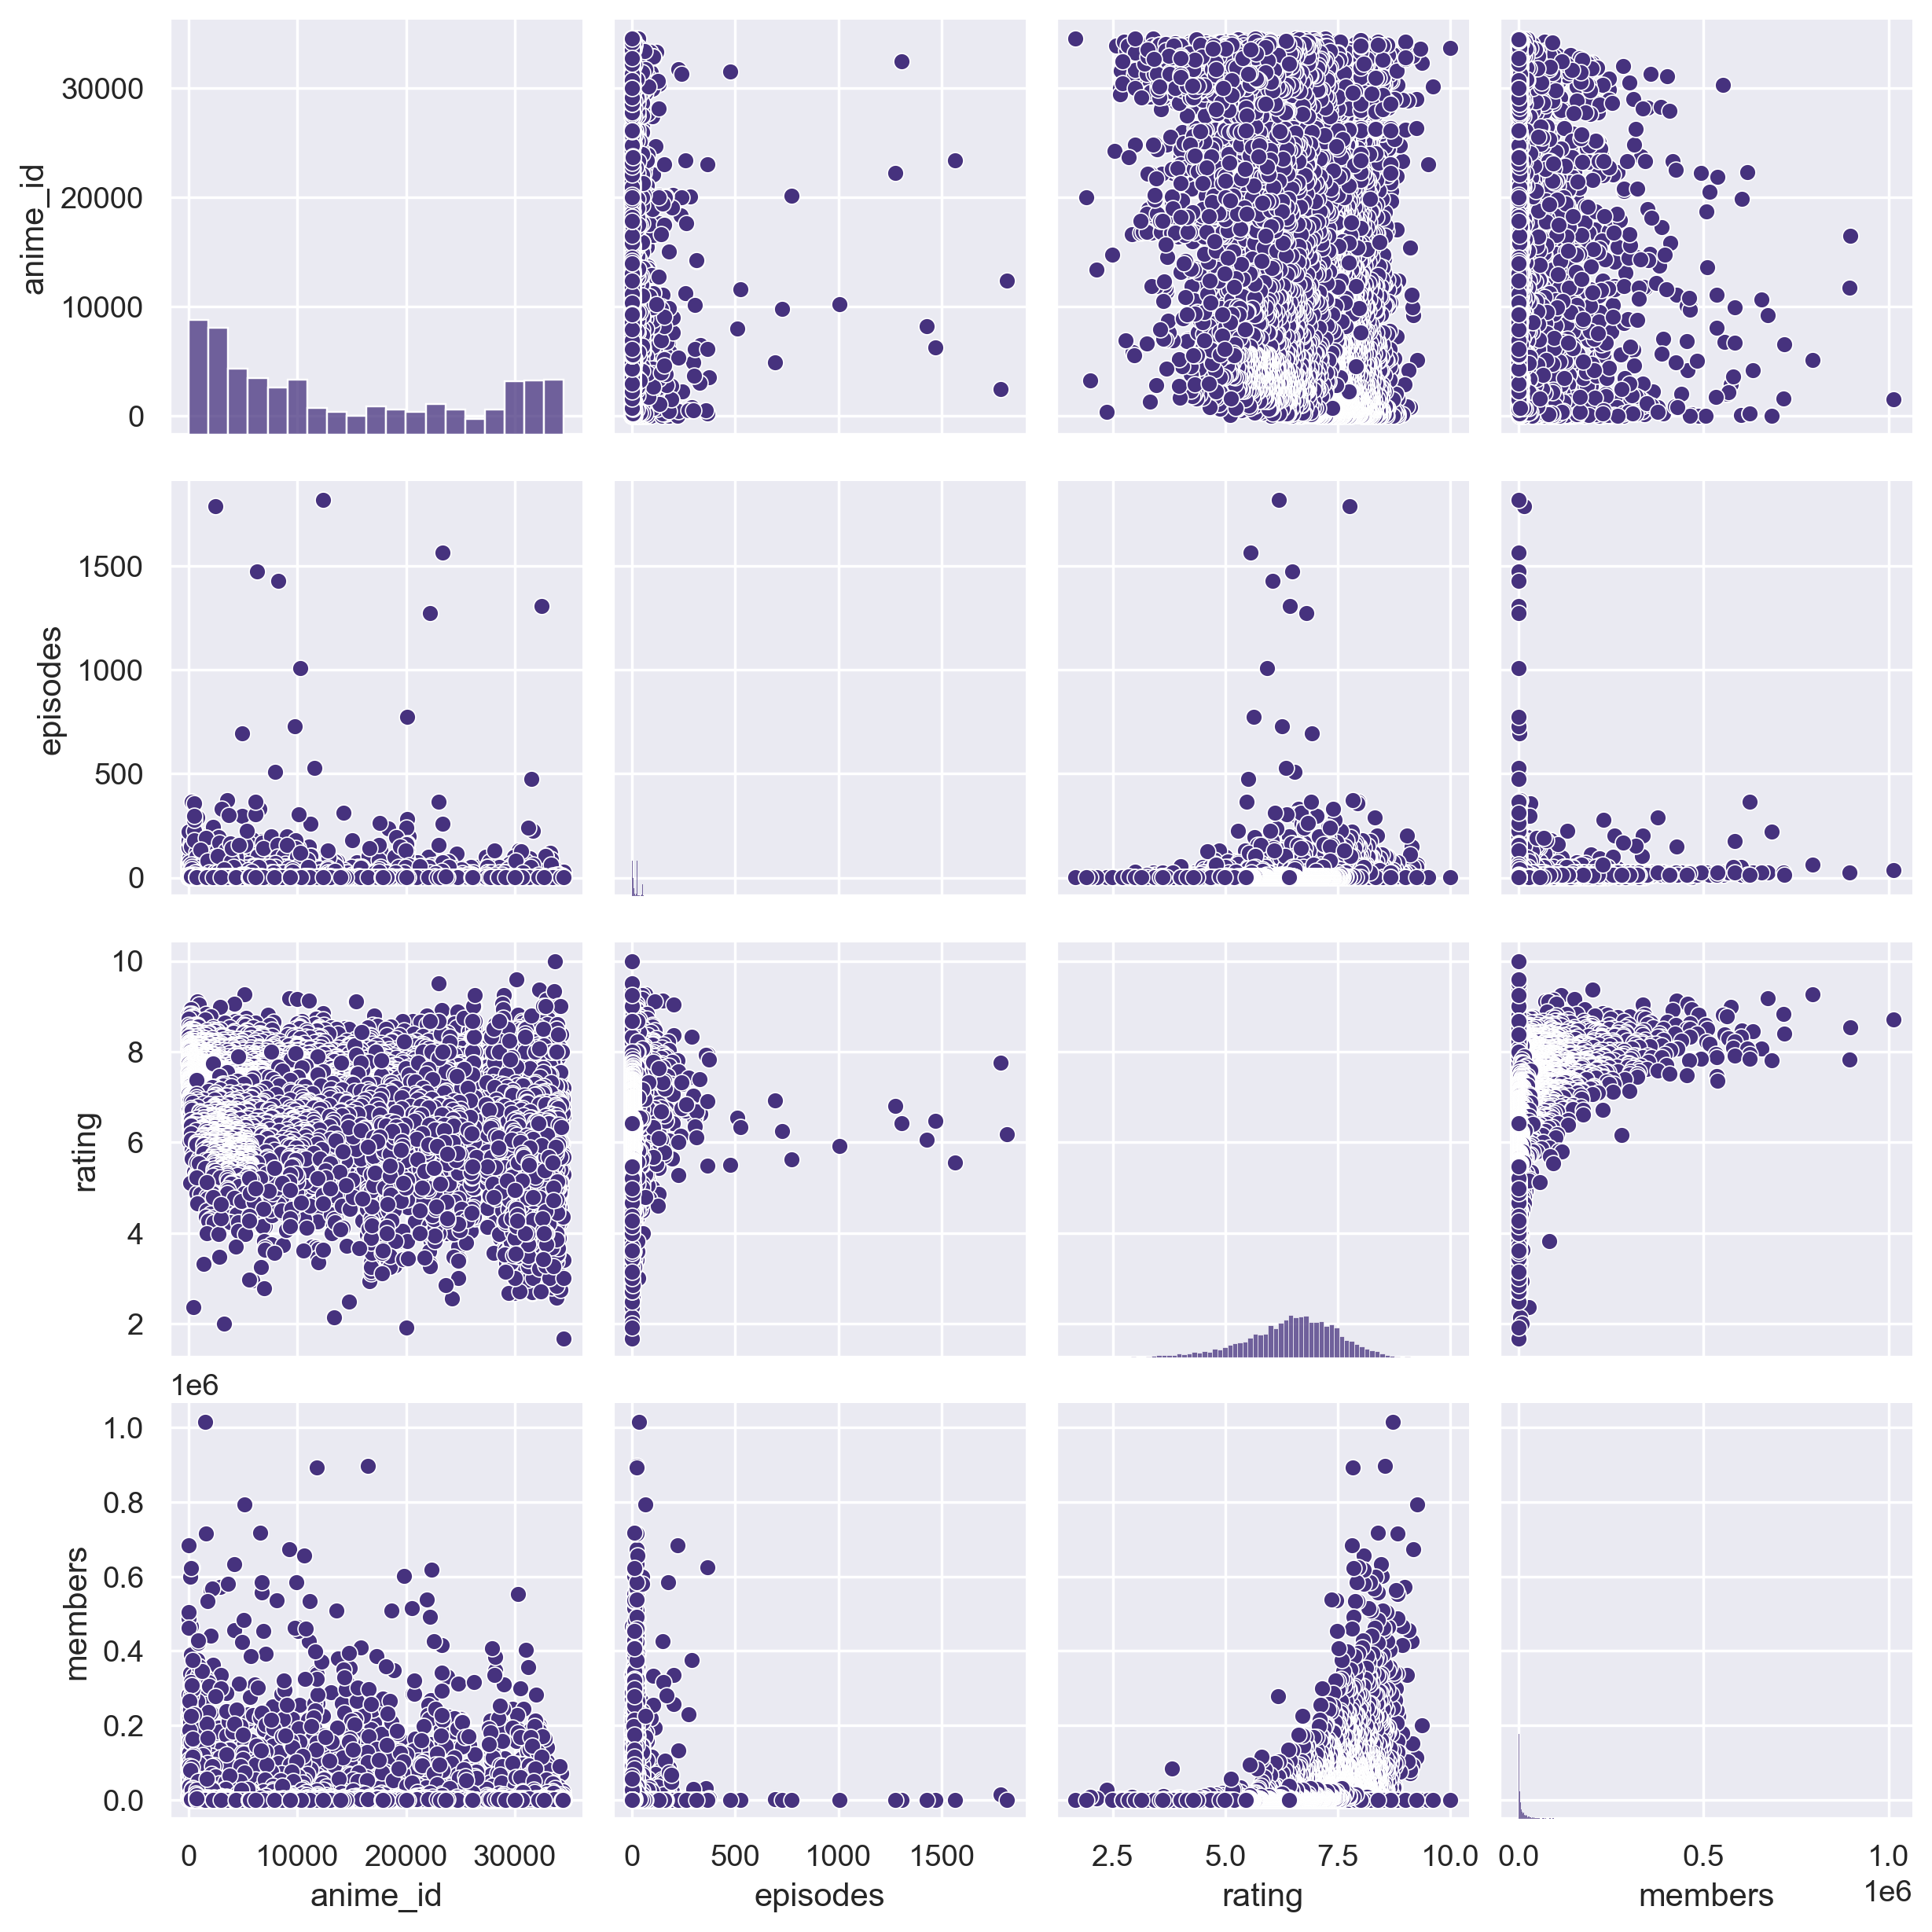

In [24]:
sns.pairplot(df)

# Outliers

We will use Capping method to treat outliers

In [25]:
df['episodes']

0         1.0
1        64.0
2        51.0
3        24.0
4        51.0
         ... 
12289     1.0
12290     1.0
12291     4.0
12292     1.0
12293     1.0
Name: episodes, Length: 12294, dtype: float64

In [26]:
# Outliers are present in the following columns
outliers_columns = ['episodes','members']

# outlier_detection
def outlier_detection(data, col_name):
    Q1 = data[col_name].quantile(0.25)
    Q3 = data[col_name].quantile(0.75)
    IQR = Q3-Q1
    LE = Q1 - 1.5*IQR
    UE = Q3 + 1.5*IQR
    #return data.index[(data[col_name] < LE) | (data[col_name] > UE)].tolist()
    return LE,UE

# Dictionary for lower and upper extreme
LU_Extremes = {}
for col in outliers_columns:
    LU_Extremes[col] = outlier_detection(df, col)
LU_Extremes

# Outliers Capping
for col in LU_Extremes:
    df.loc[df[col] < LU_Extremes[col][0] , col]=LU_Extremes[col][0]
    df.loc[df[col] > LU_Extremes[col][1] , col]=LU_Extremes[col][1]

<Axes: >

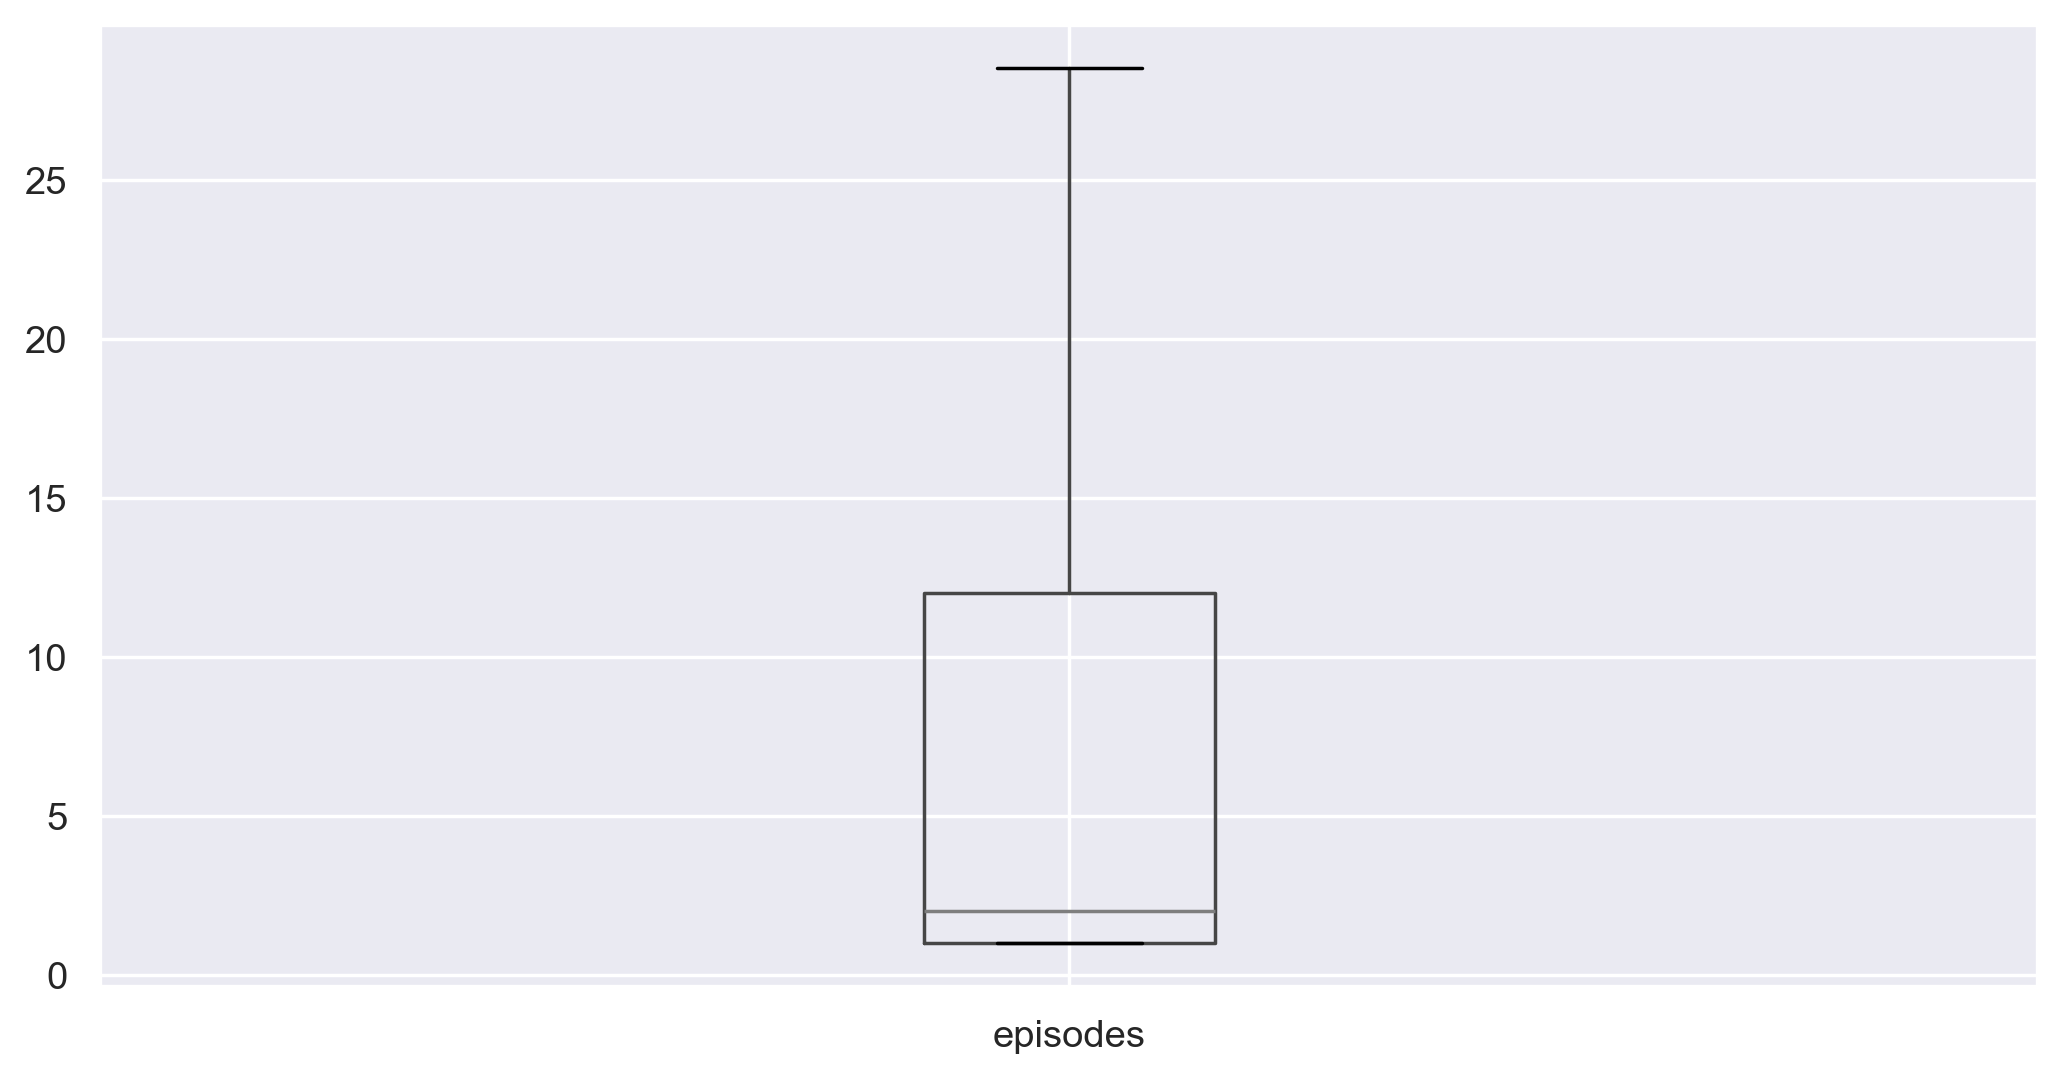

In [27]:
df.boxplot(['episodes'])

<Axes: >

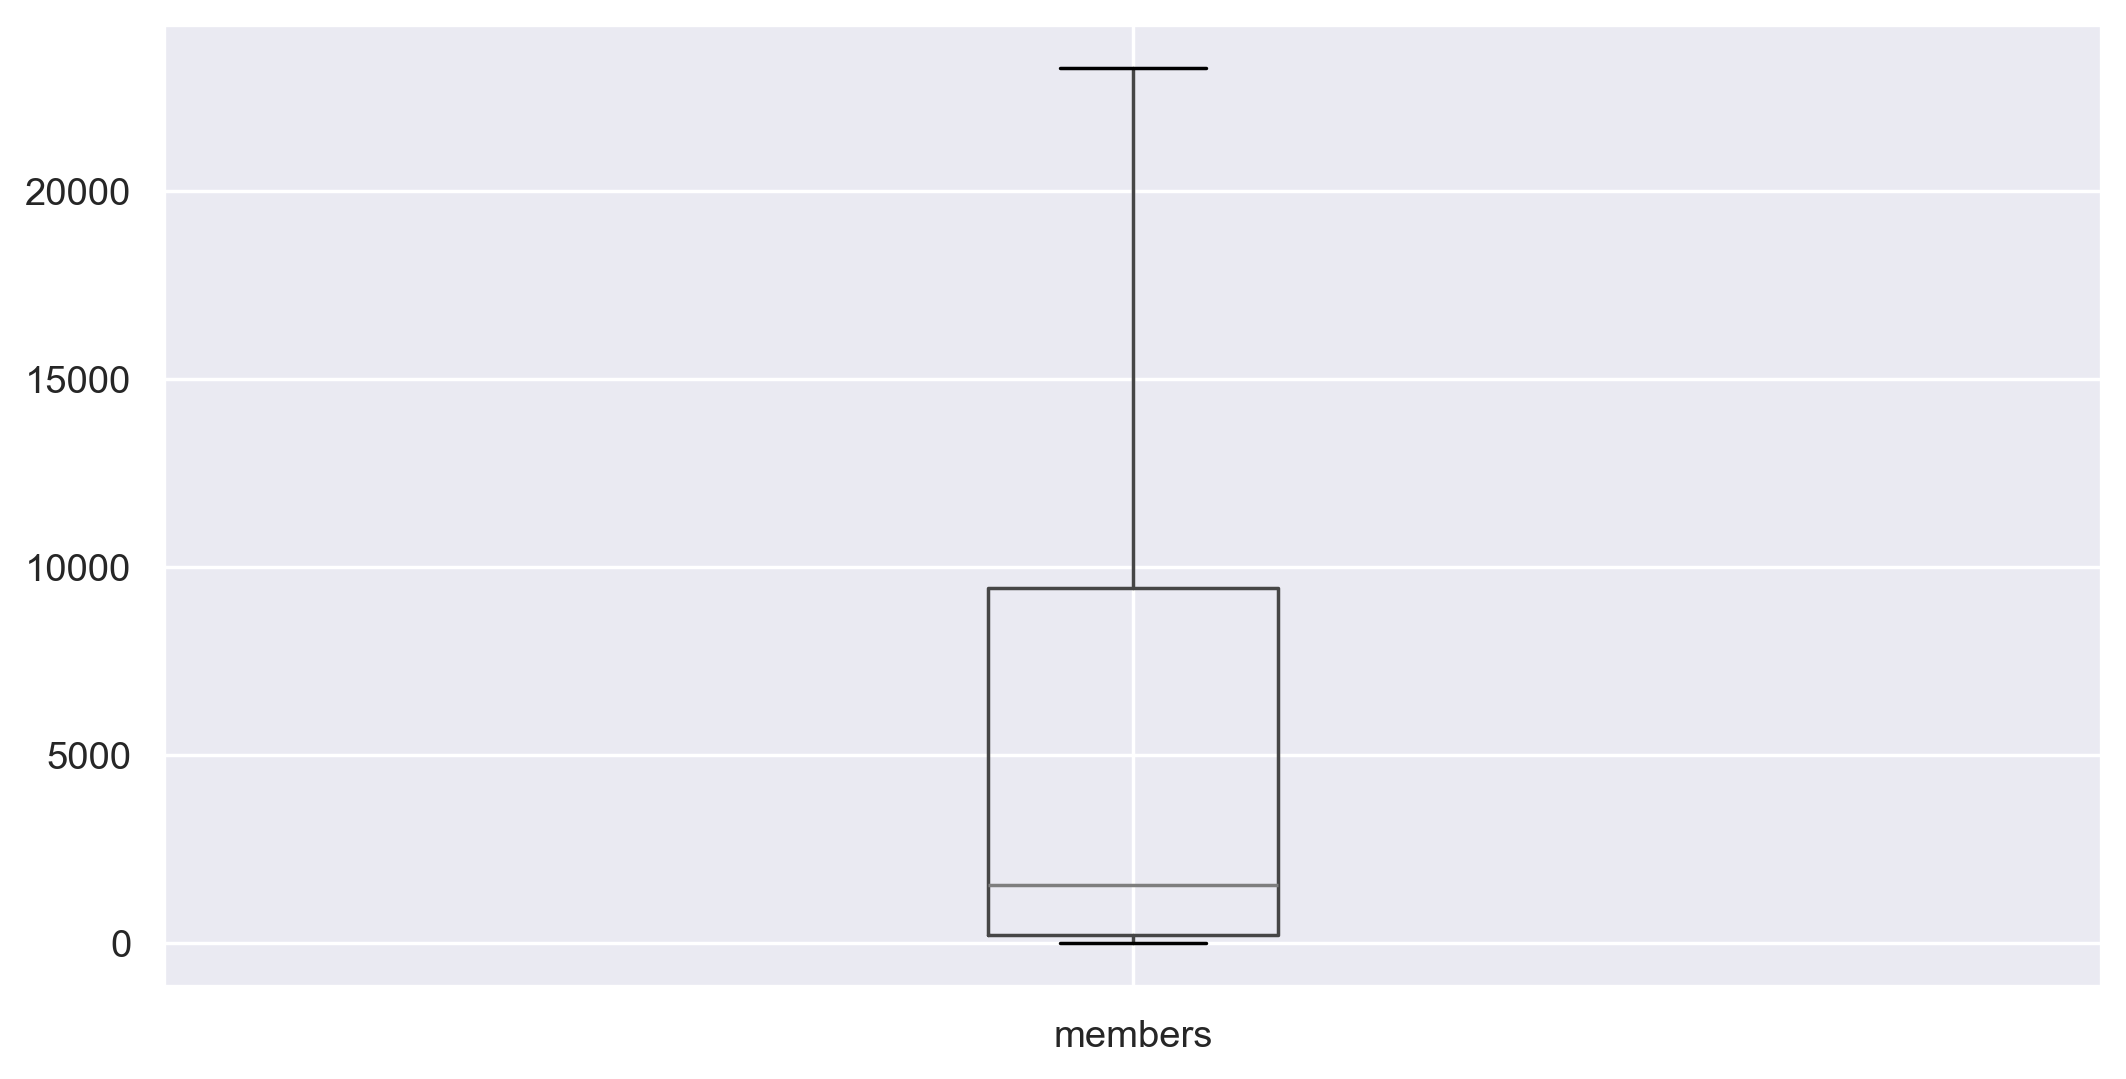

In [28]:
df.boxplot(['members'])

# Missing Value

In [29]:
df.isna().sum()

anime_id      0
name          0
genre        62
type         25
episodes    340
rating      230
members       0
dtype: int64

In [30]:
df.groupby(["type"])["episodes"].value_counts()

type   episodes
Movie  1.0         2311
       2.0            8
       3.0            7
       12.0           4
       6.0            3
                   ... 
TV     18.0           6
       19.0           4
       7.0            3
       17.0           3
       2.0            1
Name: count, Length: 118, dtype: int64

In [31]:
df[df['type'].isna()]

,anime_id,name,genre,type,episodes,rating,members
10898,30484,Steins;Gate 0,"Sci-Fi, Thriller",NaN,NaN,NaN,23255
10900,34437,Code Geass: Fukkatsu no Lelouch,"Action, Drama, Mecha, Military, Sci-Fi, Super ...",NaN,NaN,NaN,22748
10906,33352,Violet Evergarden,"Drama, Fantasy",NaN,NaN,NaN,20564
10907,33248,K: Seven Stories,"Action, Drama, Super Power, Supernatural",NaN,NaN,NaN,22133
10918,33845,Free! (Shinsaku),"School, Sports",NaN,NaN,NaN,8666
10949,33475,Busou Shoujo Machiavellianism,"Action, School, Shounen",NaN,NaN,NaN,1896
10963,31456,Code:Realize: Sousei no Himegimi,"Adventure, Fantasy, Romance, Shoujo",NaN,NaN,NaN,4017
10983,34332,Flying Babies,NaN,NaN,NaN,NaN,22
10988,34280,Gamers!,"Comedy, Romance, School",NaN,NaN,NaN,1045
10990,34485,Ganko-chan,NaN,NaN,NaN,NaN,11


* For all the records where type is missing, episodes and ratings are also missing.
* Hence we will delete these records as these records are not going to help us in building the model

In [32]:
df.dropna(subset=['type'], inplace=True)
df.isna().sum()

anime_id      0
name          0
genre        59
type          0
episodes    315
rating      205
members       0
dtype: int64

* Generally for type is Movie number of episodes equal to 1, so null entries in episodes column will be replaced by 1.0 if type is Movie

In [33]:
show_types = list((df['type'].value_counts()).keys())

for key in show_types:
    df.loc[(df['type']==key) & (df['episodes'].isna()), 'episodes']=df[df['type']==key]['episodes'].median()

df.isna().sum()

anime_id      0
name          0
genre        59
type          0
episodes      0
rating      205
members       0
dtype: int64

* Null values in genre we will replace by Unknown, as it is not feasible to predict genre from other data

In [34]:
df['genre'].fillna('Unknown', inplace=True)
df.isna().sum()

anime_id      0
name          0
genre         0
type          0
episodes      0
rating      205
members       0
dtype: int64

* Null entries in rating column we will replace by 0

In [35]:
df['rating'].fillna(0, inplace=True)
df.isna().sum()

anime_id    0
name        0
genre       0
type        0
episodes    0
rating      0
members     0
dtype: int64

### Feature Extraction:

Decide on the features that will be used for computing similarity (e.g., genres, user ratings).
Convert categorical features into numerical representations if necessary.
Normalize numerical features if required.

In [36]:
df1 = df['genre'].str.get_dummies(sep=', ')

In [37]:
new_df1 = pd.concat([df1, df], axis=1, join='inner')
new_df1

,Action,Adventure,Cars,Comedy,Dementia,Demons,Drama,Ecchi,Fantasy,Game,...,Vampire,Yaoi,Yuri,anime_id,name,genre,type,episodes,rating,members
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1.0,9.37,23255
1,1,1,0,0,0,0,1,0,1,0,...,0,0,0,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,28.5,9.26,23255
2,1,0,0,1,0,0,0,0,0,0,...,0,0,0,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,28.5,9.25,23255
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24.0,9.17,23255
4,1,0,0,1,0,0,0,0,0,0,...,0,0,0,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,28.5,9.16,23255
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12289,0,0,0,0,0,0,0,0,0,0,...,0,0,0,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1.0,4.15,211
12290,0,0,0,0,0,0,0,0,0,0,...,0,0,0,5543,Under World,Hentai,OVA,1.0,4.28,183
12291,0,0,0,0,0,0,0,0,0,0,...,0,0,0,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4.0,4.88,219
12292,0,0,0,0,0,0,0,0,0,0,...,0,0,0,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1.0,4.98,175


In [38]:
new_df1.columns

Index(['Action', 'Adventure', 'Cars', 'Comedy', 'Dementia', 'Demons', 'Drama',
       'Ecchi', 'Fantasy', 'Game', 'Harem', 'Hentai', 'Historical', 'Horror',
       'Josei', 'Kids', 'Magic', 'Martial Arts', 'Mecha', 'Military', 'Music',
       'Mystery', 'Parody', 'Police', 'Psychological', 'Romance', 'Samurai',
       'School', 'Sci-Fi', 'Seinen', 'Shoujo', 'Shoujo Ai', 'Shounen',
       'Shounen Ai', 'Slice of Life', 'Space', 'Sports', 'Super Power',
       'Supernatural', 'Thriller', 'Unknown', 'Vampire', 'Yaoi', 'Yuri',
       'anime_id', 'name', 'genre', 'type', 'episodes', 'rating', 'members'],
      dtype='object')

In [39]:
new_df1.drop(columns=['name','genre','members','episodes'], inplace=True)

In [40]:
new_df2 = pd.get_dummies(new_df1, columns = ['type'])
new_df2

,Action,Adventure,Cars,Comedy,Dementia,Demons,Drama,Ecchi,Fantasy,Game,...,Yaoi,Yuri,anime_id,rating,type_Movie,type_Music,type_ONA,type_OVA,type_Special,type_TV
0,0,0,0,0,0,0,1,0,0,0,...,0,0,32281,9.37,True,False,False,False,False,False
1,1,1,0,0,0,0,1,0,1,0,...,0,0,5114,9.26,False,False,False,False,False,True
2,1,0,0,1,0,0,0,0,0,0,...,0,0,28977,9.25,False,False,False,False,False,True
3,0,0,0,0,0,0,0,0,0,0,...,0,0,9253,9.17,False,False,False,False,False,True
4,1,0,0,1,0,0,0,0,0,0,...,0,0,9969,9.16,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12289,0,0,0,0,0,0,0,0,0,0,...,0,0,9316,4.15,False,False,False,True,False,False
12290,0,0,0,0,0,0,0,0,0,0,...,0,0,5543,4.28,False,False,False,True,False,False
12291,0,0,0,0,0,0,0,0,0,0,...,0,0,5621,4.88,False,False,False,True,False,False
12292,0,0,0,0,0,0,0,0,0,0,...,0,0,6133,4.98,False,False,False,True,False,False


### We will only Recommend the anime which got good ratings(lets fix ratings above 8)

In [41]:
new_df = new_df2[new_df2['rating']>=8]

### Now we will drop the rating column

In [42]:
new_df.drop(columns=['rating'], inplace=True)

In [43]:
new_df

,Action,Adventure,Cars,Comedy,Dementia,Demons,Drama,Ecchi,Fantasy,Game,...,Vampire,Yaoi,Yuri,anime_id,type_Movie,type_Music,type_ONA,type_OVA,type_Special,type_TV
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,32281,True,False,False,False,False,False
1,1,1,0,0,0,0,1,0,1,0,...,0,0,0,5114,False,False,False,False,False,True
2,1,0,0,1,0,0,0,0,0,0,...,0,0,0,28977,False,False,False,False,False,True
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,9253,False,False,False,False,False,True
4,1,0,0,1,0,0,0,0,0,0,...,0,0,0,9969,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10824,0,1,0,0,0,0,0,0,1,0,...,0,0,0,33762,False,False,True,False,False,False
10831,0,1,0,0,0,0,0,0,0,0,...,0,0,0,23351,False,False,False,False,False,True
10844,0,0,0,0,0,0,0,0,0,0,...,0,0,0,33828,True,False,False,False,False,False
10847,0,0,0,0,0,0,1,0,0,0,...,0,0,0,26097,False,False,False,True,False,False


# Model Building

In [44]:
from sklearn.metrics import pairwise_distances

In [58]:
pivot = new_df.drop(columns=['anime_id'])

In [59]:
final_df = np.round(pairwise_distances(pivot,metric='cosine'),4)
final_df

array([[0.    , 0.8419, 1.    , ..., 0.6838, 0.7418, 1.    ],
       [0.8419, 0.    , 0.625 , ..., 1.    , 0.7959, 1.    ],
       [1.    , 0.625 , 0.    , ..., 0.75  , 1.    , 1.    ],
       ...,
       [0.6838, 1.    , 0.75  , ..., 0.    , 1.    , 1.    ],
       [0.7418, 0.7959, 1.    , ..., 1.    , 0.    , 0.5918],
       [1.    , 1.    , 1.    , ..., 1.    , 0.5918, 0.    ]])

In [60]:
sim = 1 - final_df
sim

array([[1.    , 0.1581, 0.    , ..., 0.3162, 0.2582, 0.    ],
       [0.1581, 1.    , 0.375 , ..., 0.    , 0.2041, 0.    ],
       [0.    , 0.375 , 1.    , ..., 0.25  , 0.    , 0.    ],
       ...,
       [0.3162, 0.    , 0.25  , ..., 1.    , 0.    , 0.    ],
       [0.2582, 0.2041, 0.    , ..., 0.    , 1.    , 0.4082],
       [0.    , 0.    , 0.    , ..., 0.    , 0.4082, 1.    ]])

In [61]:
np.fill_diagonal(sim,0)
sim

array([[0.    , 0.1581, 0.    , ..., 0.3162, 0.2582, 0.    ],
       [0.1581, 0.    , 0.375 , ..., 0.    , 0.2041, 0.    ],
       [0.    , 0.375 , 0.    , ..., 0.25  , 0.    , 0.    ],
       ...,
       [0.3162, 0.    , 0.25  , ..., 0.    , 0.    , 0.    ],
       [0.2582, 0.2041, 0.    , ..., 0.    , 0.    , 0.4082],
       [0.    , 0.    , 0.    , ..., 0.    , 0.4082, 0.    ]])

In [62]:
similarity = pd.DataFrame(sim)
similarity

,0,1,2,3,4,5,6,7,8,9,...,617,618,619,620,621,622,623,624,625,626
0,0.0000,0.1581,0.0000,0.0000,0.0000,0.3651,0.0000,0.2000,0.1581,0.0000,...,0.3162,0.0000,0.0000,0.2582,0.2582,0.0000,0.1826,0.3162,0.2582,0.0000
1,0.1581,0.0000,0.3750,0.2041,0.3750,0.4330,0.6325,0.3162,0.2500,0.3750,...,0.0000,0.2041,0.6124,0.2041,0.2041,0.4082,0.2887,0.0000,0.2041,0.0000
2,0.0000,0.3750,0.0000,0.4082,1.0000,0.4330,0.4743,0.1581,0.8750,1.0000,...,0.0000,0.4082,0.2041,0.0000,0.0000,0.0000,0.1443,0.2500,0.0000,0.0000
3,0.0000,0.2041,0.4082,0.0000,0.4082,0.2357,0.2582,0.2582,0.2041,0.4082,...,0.0000,0.3333,0.3333,0.0000,0.0000,0.0000,0.2357,0.0000,0.0000,0.0000
4,0.0000,0.3750,1.0000,0.4082,0.0000,0.4330,0.4743,0.1581,0.8750,1.0000,...,0.0000,0.4082,0.2041,0.0000,0.0000,0.0000,0.1443,0.2500,0.0000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
622,0.0000,0.4082,0.0000,0.0000,0.0000,0.0000,0.2582,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.6667,0.0000,0.0000,0.0000,0.2357,0.0000,0.0000,0.0000
623,0.1826,0.2887,0.1443,0.2357,0.1443,0.1667,0.3651,0.0000,0.0000,0.1443,...,0.0000,0.2357,0.4714,0.0000,0.0000,0.2357,0.0000,0.0000,0.0000,0.0000
624,0.3162,0.0000,0.2500,0.0000,0.2500,0.0000,0.0000,0.0000,0.5000,0.2500,...,0.5000,0.4082,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
625,0.2582,0.2041,0.0000,0.0000,0.0000,0.2357,0.0000,0.5164,0.0000,0.0000,...,0.0000,0.0000,0.0000,1.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.4082


### Find out similar anime

In [63]:
# Get anime id
def get_anime_id(df,name):
    return df[df["name"]==name]['anime_id'].to_list()

# Print similar animes by name
def print_similar_animes(data,sim, query):
    found_id = get_anime_id(data,query)  
    sim_id = sim[found_id]
    print(found_id,':',sim_id)
    for id in sim_id:
        print(data[data['anime_id']==id]["name"])

In [64]:
print_similar_animes(data = df,sim = similarity.idxmax(), query="Mononoke Hime")

[164] : 164    248
dtype: int64
3945    Ichigo 100%
Name: name, dtype: object


In [65]:
df[(df['anime_id'] == 164) | (df['anime_id'] == 9204)]

,anime_id,name,genre,type,episodes,rating,members
24,164,Mononoke Hime,"Action, Adventure, Fantasy",Movie,1.0,8.81,23255
385,9204,Omae Umasou da na,"Action, Adventure, Fantasy, Kids",Movie,1.0,8.13,6645
